# TEC profiles

In [6]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import os 
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from main import *

import matplotlib.ticker as mtick

    
datetime.date(2020, 12, 12).timetuple().tm_yday 

347

ionPrf_F701.2020.261.01.45.G22_0001.0001_nc
ionPrf_F701.2020.261.03.25.G01_0001.0001_nc
ionPrf_F704.2020.261.01.37.G22_0001.0001_nc
ionPrf_F704.2020.261.03.25.R03_0001.0001_nc


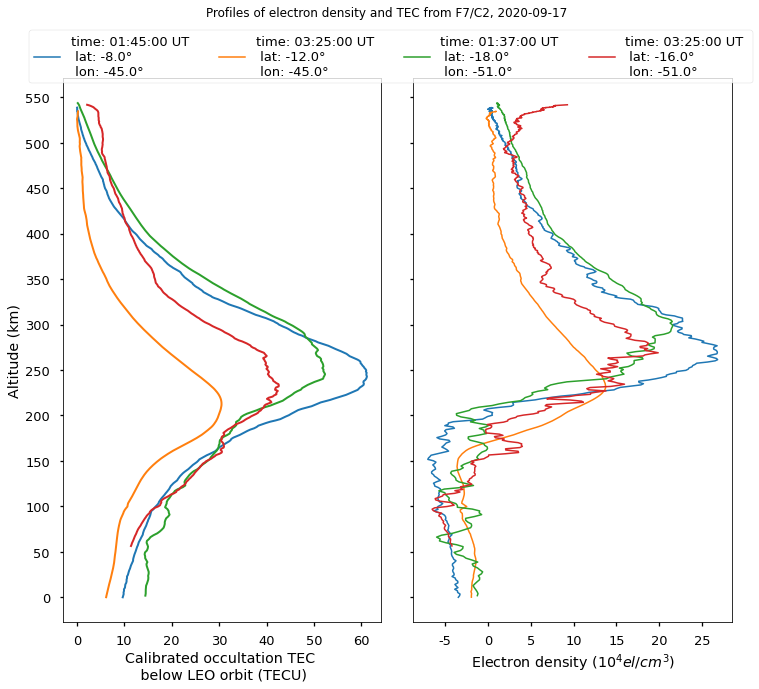

In [3]:
infile = "C:\\Users\\LuizF\\Downloads\\ionPrf_trops.2020.261\\"

_, _, files = next(os.walk(infile))

times_sel = [datetime.time(1, 37), datetime.time(1, 45), datetime.time(3, 25)]


start_lat, end_lat = -40, 10
start_lon, end_lon = -80, -30

fig, ax = plt.subplots(figsize = (12, 10), ncols = 2, sharey = True)
plt.style.use('seaborn-talk')
plt.subplots_adjust(wspace = 0.1)


for filename in files_sel:
    if split_filename(filename).time in times_sel:
        ds = xr.open_dataset(infile + filename)

        ds_mean = ds.mean()
        
        time = split_filename(filename).time
        
        lat = ds_mean['GEO_lat'].values
        lon = ds_mean['GEO_lon'].values
        
        lat_cond = (lat > start_lat) and (lon > start_lon)

        lon_cond = (lat < end_lat) and (lon < end_lon)

        if lat_cond and lon_cond:
            print(filename)
            
            label = f"time: {time} UT \n lat: {lat.mean().round()}° \n lon: {lon.mean().round()}°"
     
            ds['TEC_cal'].plot(ax = ax[0], y = 'MSL_alt', lw = 2, label = label)
                            
            ds['ELEC_dens'].plot(ax = ax[1], y = 'MSL_alt', lw = 1.5,  label = label)
                              

ax[1].legend(loc='center', bbox_to_anchor=(-0.07, 1.04), ncol = 4)

scale_x = 1e4
ticks_x = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax[1].xaxis.set_major_formatter(ticks_x)

label_tec = "Calibrated occultation TEC \n below LEO orbit (TECU)"
label_el = f"Electron density ($10^4 el/cm^3$)"


ax[1].set(ylabel = '', xlabel = label_el, yticks = np.arange(0, 600, 50))

ax[0].set(xlabel = label_tec, ylabel = 'Altitude (km)')

fig.suptitle("Profiles of electron density and TEC from F7/C2, 2020-09-17", y = 0.98)

#plt.rcParams.update({'font.size': 12})   


plt.show()

In [16]:
infile = "C:\\Users\\LuizF\\Downloads\\ionPrf_trops.2020.261\\"

filename = ['ionPrf_F701.2020.261.01.45.G22_0001.0001_nc', 'ionPrf_F701.2020.261.03.25.G01_0001.0001_nc'] 




def get_maxtime(ds):
    
    year = ds.attrs['year']
    month = ds.attrs['month']
    day = ds.attrs['day']
    hour = ds.attrs['hour']
    minute = ds.attrs['minute']
    second = ds.attrs['second']
    
    return datetime.datetime(year, month, day, hour, minute, second)



ds = xr.open_dataset(infile + filename[1])

get_maxtime(ds)

ds = ds.apply(np.fabs)

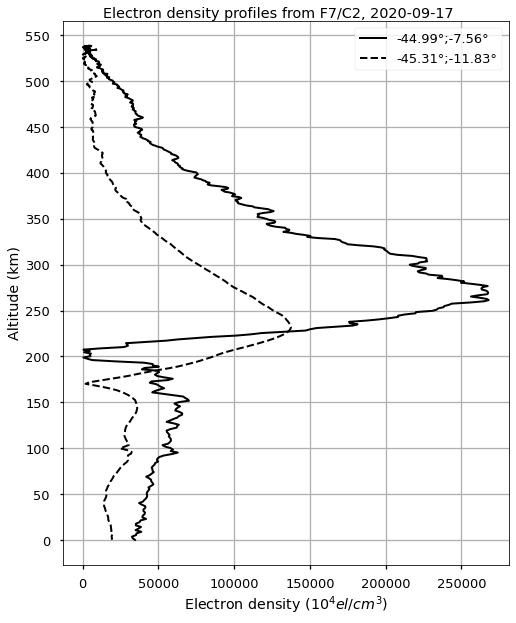

In [22]:
def plot(ax, filename, line = '-'):
    
    ds = xr.open_dataset(infile + filename)
    
    coords = np.array([ds['GEO_lon'].mean(), ds['GEO_lat'].mean()])
    
    label = "{:.2f}°;{:.2f}°".format(round(coords[0], 2), round(coords[1], 2))
    
    abs(ds['ELEC_dens']).plot(ax = ax, y = 'MSL_alt', lw = 2, 
                       linestyle = line, color = 'black', label = label)
    ax.grid(True)
    scale_x = 1e4
    ticks_x = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))

    #ax.xaxis.set_major_formatter(ticks_x)
    ax.legend()
        
fig, ax = plt.subplots(figsize = (8, 10), sharey = True)
plt.style.use('seaborn-talk')
plt.subplots_adjust(wspace = 0.1)



#label_tec = "Calibrated occultation TEC \n below LEO orbit (TECU)"
label_el = f"Electron density ($10^4 el/cm^3$)"

plot(ax, 'ionPrf_F701.2020.261.01.45.G22_0001.0001_nc')

plot(ax, 'ionPrf_F701.2020.261.03.25.G01_0001.0001_nc', line = '--')



ax.set(ylabel = 'Altitude (km)',  xlabel = label_el, yticks = np.arange(0, 600, 50))

fig.suptitle("Electron density profiles from F7/C2, 2020-09-17", y = 0.9)

plt.rcParams.update({'font.size': 12})   


plt.show()

In [19]:
FigureName = 'IONPRF_NEb_20200917.png'
Pathout = "Figures\\"
fig.savefig(Pathout + FigureName ,  dpi = 100, bbox_inches="tight")
